<a href="https://colab.research.google.com/github/champ-rtu/CE888/blob/main/Emotion_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
#Open train_text file 
x = []
with open('train_text.txt', 'r', encoding='utf-8') as f:
  data = f.readlines()
  
  for row in data:
    x.append(row)

In [3]:
print(len(x))

3257


In [4]:
#Open train_label file 
y = []
with open('train_labels.txt', 'r', encoding='utf-8') as f:
  data = f.read().split('\n')

  for row in data:
    y.append(row)

In [5]:
print(len(y))

3258


In [6]:
#combine both data to dataframe
data = pd.DataFrame(zip(x, y),  columns=['Comments', 'Labels'] )
data.head()

,Comments,Labels
0,“Worry is a down payment on a problem you may ...,2
1,My roommate: it's okay that we can't spell bec...,0
2,No but that's so cute. Atsu was probably shy a...,1
3,Rooneys fucking untouchable isn't he? Been fuc...,0
4,it's pretty depressing when u hit pan on ur fa...,3


Label describesion

0. anger
1. joy
2. optimism
3. sadness

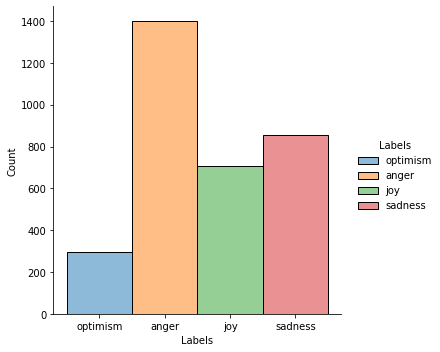

In [8]:
#Plot to identify number of offensive and non-offensive 

df = data.copy()
df['Labels'] = df['Labels'].map({'0':'anger', '1':'joy', '2':'optimism','3':'sadness'})
sns_plot = sns.displot(x=df['Labels'], data=df, hue='Labels')

In [28]:
#Check number of each label(anger, joy, optimism, sadness)
df['Labels'].value_counts()

anger       1400
sadness      855
joy          708
optimism     294
Name: Labels, dtype: int64

In [9]:
from textblob import TextBlob

In [10]:
#create new 2 columns which is len and word counts
data['length'] = data['Comments'].apply(lambda x: len(x))
data['word_count'] = data['Comments'].apply(lambda x: len(x.split()))

In [12]:
data.head()

,Comments,Labels,length,word_count
0,“Worry is a down payment on a problem you may ...,2,106,17
1,My roommate: it's okay that we can't spell bec...,0,100,14
2,No but that's so cute. Atsu was probably shy a...,1,96,18
3,Rooneys fucking untouchable isn't he? Been fuc...,0,104,13
4,it's pretty depressing when u hit pan on ur fa...,3,67,11


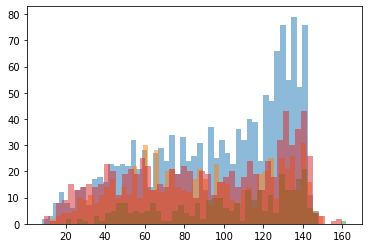

In [12]:
#Plot lenght with labels columns 
plt.hist(data[data['Labels'] == '0']['length'], bins = 50, alpha = 0.5)
plt.hist(data[data['Labels'] == '1']['length'], bins = 50, alpha = 0.5)
plt.hist(data[data['Labels'] == '2']['length'], bins = 50, alpha = 0.5)
plt.hist(data[data['Labels'] == '3']['length'], bins = 50, alpha = 0.5)
plt.show()

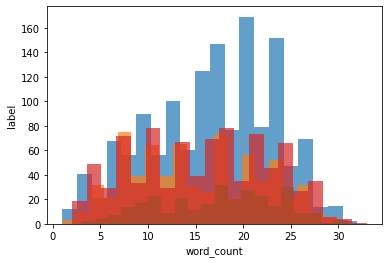

In [13]:
#Plot number of words with labels columns 
plt.hist(data[data['Labels'] == '0']['word_count'], bins = 20, alpha = 0.7)
plt.hist(data[data['Labels'] == '1']['word_count'], bins = 20, alpha = 0.7)
plt.hist(data[data['Labels'] == '2']['word_count'], bins = 20, alpha = 0.7)
plt.hist(data[data['Labels'] == '3']['word_count'], bins = 20, alpha = 0.7)

plt.xlabel('word_count')
plt.ylabel('label')
plt.show()

###Preprocessing text data
1. convert text to lowercase
2. remove number and punctuation
3. tokenization
4. remove stopword
5. stem

In [13]:
#import library for preprocessing step
import nltk
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [14]:
 import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
#create punctuation, stopword and stem 
punct = string.punctuation
stopwords = list(STOP_WORDS)
nlp = spacy.load('en_core_web_sm')
ps = PorterStemmer()

In [16]:
#Add "user " to stopwords
STOP_WORDS.add('user')
nlp.vocab['user'].is_stop

True

In [17]:
#Create fucction for preprocessing step
#the first function is remove punctuation, covert text to lower case
def preprocessing_1(text):
  txt = re.sub(r'\d+','', text)
  txt = txt.translate(str.maketrans("","",punct))
  txt = txt.lower()
  txt = txt.strip()
  return txt

#For the second function; tokenization and remove stopwords
def preprocessing_2(text):
  txt = word_tokenize(text)
  txt = [i for i in txt if not i in stopwords]
  txt = txt = " ".join(txt)
  return txt

#The last function; stemming
def stem(text):
  txt = word_tokenize(text)
  txt = [ps.stem(i) for i in txt ]
  txt = txt = " ".join(txt)
  return txt

In [21]:
data['Comments'] = data['Comments'].apply(lambda x: preprocessing_1(x))
data['Comments'] = data['Comments'].apply(lambda x: preprocessing_2(x))

In [22]:
data.head(10)

,Comments,Labels,length,word_count,polarity
0,“ worry payment problem joyce meyer motivation...,2,106,17,0.000000
1,roommate okay cant spell autocorrect terrible ...,0,100,14,-0.250000
2,thats cute atsu probably shy photos cherry hel...,1,96,18,0.000000
3,rooneys fucking untouchable isnt fucking dread...,0,104,13,-0.800000
4,pretty depressing u hit pan ur favourite highl...,3,67,11,-0.175000
5,user pussy weak heard stfu bitch got threaten ...,0,119,26,-0.020833
6,making yearly transition excited hopeful colle...,3,115,16,-0.246429
7,tiller breezy collab album rapping singing pro...,1,80,14,0.000000
8,user broadband shocking regretting signing ang...,0,86,10,-0.750000
9,user look teef growl,0,34,6,0.000000


In [23]:
#Create polarity column to check correlation between labels
data['polarity'] = data['Comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head(10)

,Comments,Labels,length,word_count,polarity
0,“ worry payment problem joyce meyer motivation...,2,106,17,0.000000
1,roommate okay cant spell autocorrect terrible ...,0,100,14,-0.250000
2,thats cute atsu probably shy photos cherry hel...,1,96,18,0.000000
3,rooneys fucking untouchable isnt fucking dread...,0,104,13,-0.800000
4,pretty depressing u hit pan ur favourite highl...,3,67,11,-0.175000
5,user pussy weak heard stfu bitch got threaten ...,0,119,26,-0.020833
6,making yearly transition excited hopeful colle...,3,115,16,-0.246429
7,tiller breezy collab album rapping singing pro...,1,80,14,0.000000
8,user broadband shocking regretting signing ang...,0,86,10,-0.750000
9,user look teef growl,0,34,6,0.000000


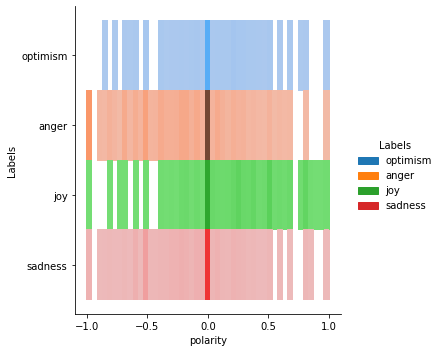

In [27]:
#Plot polarity with labels
sns_plot = sns.displot(x=data['polarity'],y = df['Labels'], data=df, hue='Labels')

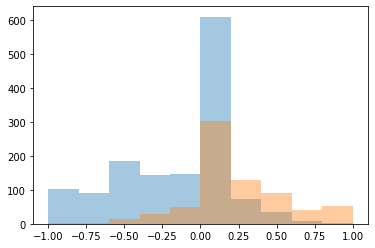

In [42]:
plt.hist(data[data['Labels'] == '0']['polarity'], bins =10, alpha = 0.4)
plt.hist(data[data['Labels'] == '1']['polarity'], bins = 10, alpha = 0.4)

plt.show()

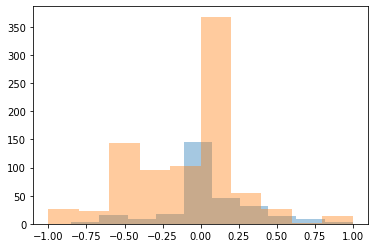

In [43]:
plt.hist(data[data['Labels'] == '2']['polarity'], bins =10, alpha = 0.4)
plt.hist(data[data['Labels'] == '3']['polarity'], bins = 10, alpha = 0.4)
plt.show()

In [44]:
from wordcloud import WordCloud

In [45]:
#seperate labels
df1 = data[data['Labels']=='0']
df2 = data[data['Labels']=='1']
df3 = data[data['Labels']=='2']
df4 = data[data['Labels']=='3']

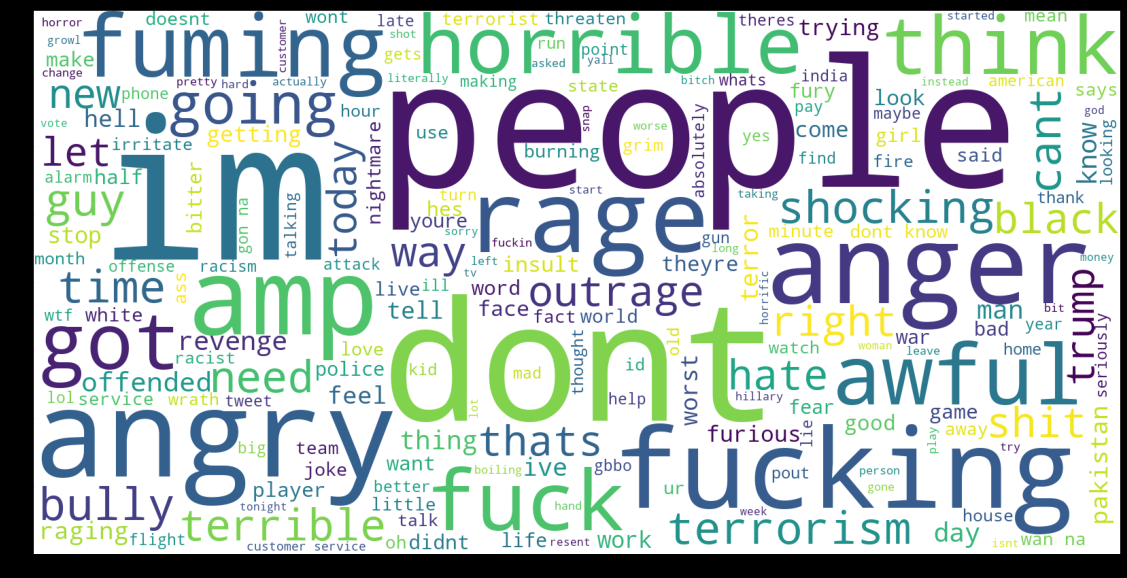

In [46]:
#Visualize the frequency words in anger comments.
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df1['Comments'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

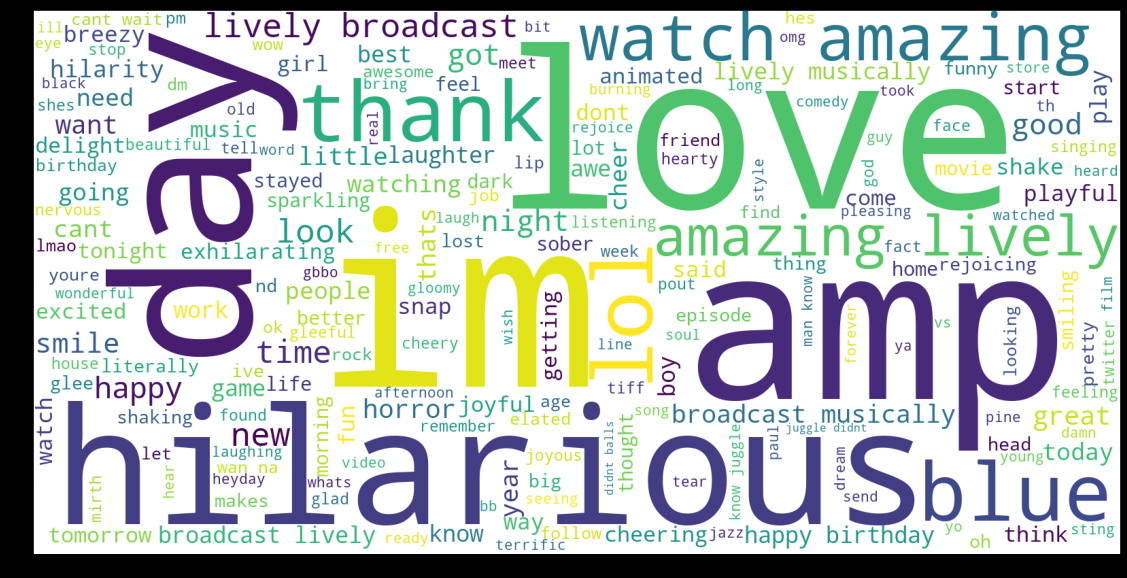

In [47]:
#Visualize the frequency words in joy comments.
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df2['Comments'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

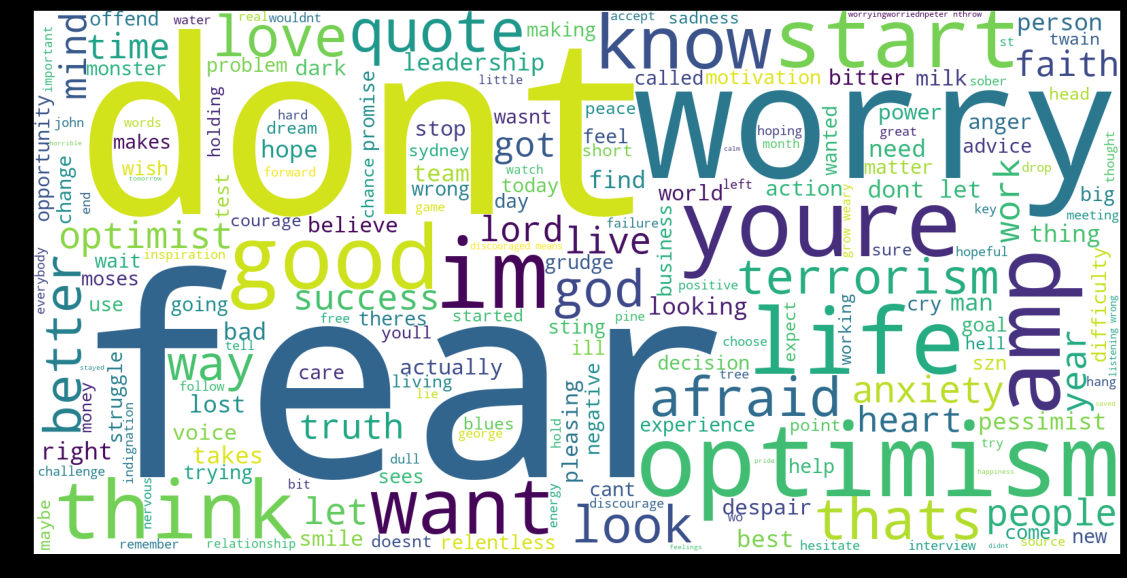

In [48]:
#Visualize the frequency words in optimism comments.
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df3['Comments'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

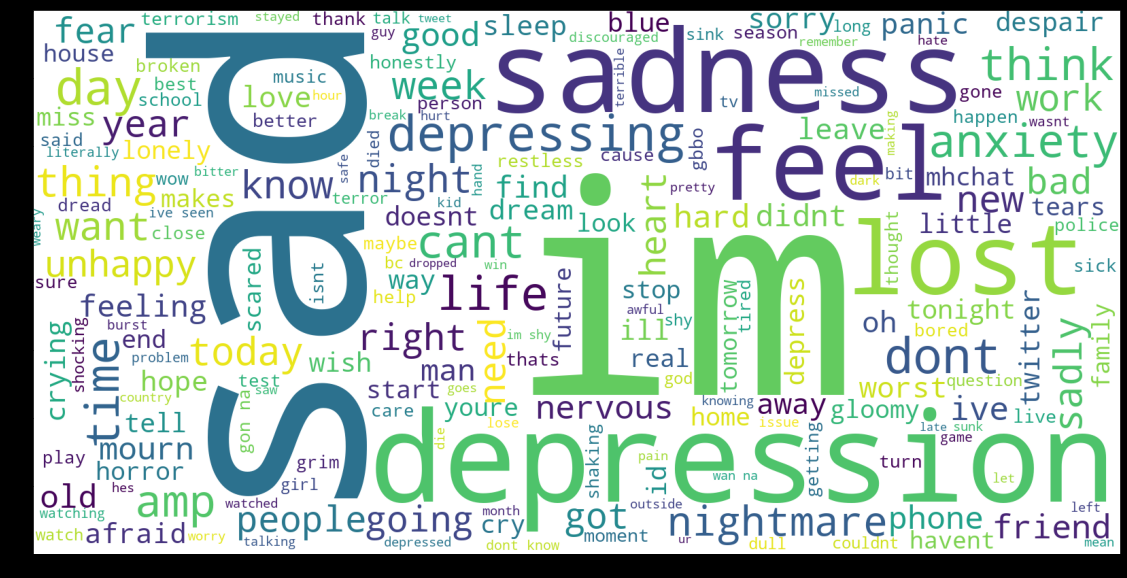

In [49]:
#Visualize the frequency words in sadness comments.
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df4['Comments'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [30]:
#apply stem function
data['Comments'] = data['Comments'].apply(lambda x: stem(x))
data.head()

,Comments,Labels,length,word_count,polarity
0,“ worri payment problem joyc meyer motiv leade...,2,106,17,0.000
1,roommat okay cant spell autocorrect terribl fi...,0,100,14,-0.250
2,that cute atsu probabl shi photo cherri help uwu,1,96,18,0.000
3,rooney fuck untouch isnt fuck dread depay look...,0,104,13,-0.800
4,pretti depress u hit pan ur favourit highlight,3,67,11,-0.175


###Modeling Section 

in this section 
we create pinline that includes TF-IDF and Random Forest classifier 


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [52]:

y = data['Labels']
x = data['Comments']

In [53]:
#Split train and test dataset
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size = 0.3, random_state =0, shuffle = True)

In [55]:
len(X_train), len(y_train)

(2279, 2279)

In [56]:
#Create pipline
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [57]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [58]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score

In [60]:
#Evaluation by F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       427
           1       0.71      0.58      0.64       212
           2       0.55      0.21      0.30        81
           3       0.57      0.74      0.65       258

    accuracy                           0.69       978
   macro avg       0.65      0.58      0.59       978
weighted avg       0.69      0.69      0.68       978



In [61]:
#Open test_text 
xt = []
with open('test_text.txt', 'r', encoding='utf-8') as f:
  data = f.readlines()
  
  for row in data:
    xt.append(row)

#Open test_labels
yt = []
with open('test_labels.txt', 'r', encoding='utf-8') as f:
  data = f.read().split('\n')

  for row in data:
    yt.append(row)

In [62]:
#Combine both to DataFrame
data_t = pd.DataFrame(zip(xt, yt),  columns=['Comments', 'Labels'] )
data_t.head()

,Comments,Labels
0,#Deppression is real. Partners w/ #depressed p...,3
1,@user Interesting choice of words... Are you c...,0
2,My visit to hospital for care triggered #traum...,3
3,@user Welcome to #MPSVT! We are delighted to h...,1
4,What makes you feel #joyful? \n,1


In [63]:
#Preprocessing in test file
data_t['Comments'] = data_t['Comments'].apply(lambda x: preprocessing_1(x))
data_t['Comments'] = data_t['Comments'].apply(lambda x: preprocessing_2(x))
data_t['Comments'] = data_t['Comments'].apply(lambda x: stem(x))

In [64]:
#Classified by Randomforest model
y_pred = classifier.predict(data_t['Comments'])

In [65]:
#Evaluation 
print(classification_report(data_t['Labels'], y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       558
           1       0.71      0.52      0.60       358
           2       0.53      0.17      0.26       123
           3       0.53      0.70      0.61       382

    accuracy                           0.63      1421
   macro avg       0.61      0.54      0.55      1421
weighted avg       0.64      0.63      0.62      1421

